In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('games_info_and_reviews.csv')


In [4]:
df.head()


,game_id,game_name,is_free,genres,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,review_score,owners
0,1744330,No More Heroes 3,False,Action,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,8,"20,000 .. 50,000"
1,1743380,SCP: Doki Doki Anomaly,False,"Indie, RPG","Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,8,"0 .. 20,000"
2,1742450,西游记2021,False,"Adventure, Casual, Indie, RPG, Strategy",Single-player,"30 Sep, 2021",CDN$ 11.49,0,No user reviews,0,0,0,"50,000 .. 100,000"
3,1742470,My Newborn Life In A Harem,False,"Casual, RPG",Single-player,"29 Mar, 2022",CDN$ 14.49,0,Mixed,18,12,5,"0 .. 20,000"
4,1742500,My Dear Frankenstein -English Edition-,False,Adventure,Single-player,"30 Sep, 2021",CDN$ 5.69,0,4 user reviews,4,0,0,"0 .. 20,000"


In [5]:
# Find unique genres across all rows
unique_genres = set()
for genres in df['genres']:
    if genres is not None:
        unique_genres.update(genres.split(', '))

# Create columns for each unique genre
for genre in unique_genres:
    df[genre] = 0

# Assign 1 to corresponding genre columns for each game
for index, row in df.iterrows():
    genres = row['genres']
    if genres is not None:
        for genre in genres.split(', '):
            df.at[index, genre] = 1

# Drop the original 'genres' column
df.drop(columns=['genres'], inplace=True)

print(df)

       game_id                               game_name  is_free  \
0      1744330                        No More Heroes 3    False   
1      1743380                  SCP: Doki Doki Anomaly    False   
2      1742450                                 西游记2021    False   
3      1742470              My Newborn Life In A Harem    False   
4      1742500  My Dear Frankenstein -English Edition-    False   
...        ...                                     ...      ...   
11963   282070                        This War of Mine    False   
11964   703870                            Make a word!    False   
11965  1599660               Sackboy™: A Big Adventure    False   
11966   359550         Tom Clancy's Rainbow Six® Siege    False   
11967  1778820                                TEKKEN 8    False   

                                              categories  release_date  \
0      Single-player, Steam Achievements, Full contro...  11 Oct, 2022   
1                      Single-player, Steam Ach

In [8]:
# List of column names to keep
columns_to_keep = ['game_id', 'game_name', 'Adventure', 'Action', 'RPG', 'Indie']

# Keep only the specified columns in the DataFrame
df1 = df[columns_to_keep]

# Display the updated DataFrame
print(df1)


       game_id                               game_name  Adventure  Action  \
0      1744330                        No More Heroes 3          0       1   
1      1743380                  SCP: Doki Doki Anomaly          0       0   
2      1742450                                 西游记2021          1       0   
3      1742470              My Newborn Life In A Harem          0       0   
4      1742500  My Dear Frankenstein -English Edition-          1       0   
...        ...                                     ...        ...     ...   
11963   282070                        This War of Mine          1       0   
11964   703870                            Make a word!          0       0   
11965  1599660               Sackboy™: A Big Adventure          1       0   
11966   359550         Tom Clancy's Rainbow Six® Siege          0       1   
11967  1778820                                TEKKEN 8          0       1   

       RPG  Indie  
0        0      0  
1        1      1  
2        1     

In [13]:
unique_values = df['review_score_desc'].unique()
print(unique_values)

['Very Positive' 'No user reviews' 'Mixed' '4 user reviews'
 'Mostly Positive' '2 user reviews' 'Positive' '1 user reviews'
 '3 user reviews' '9 user reviews' '5 user reviews' '6 user reviews'
 'Mostly Negative' 'Overwhelmingly Positive' '7 user reviews'
 '8 user reviews' 'Negative' 'Very Negative' 'Overwhelmingly Negative']


In [14]:
# Define the list of desired categories
desired_categories = ['Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive',
                      'Negative', 'Very Negative', 'Mostly Negative', 'Overwhelmingly Negative']

# Create a boolean mask to filter the DataFrame
mask = df['review_score_desc'].isin(desired_categories)

# Apply the mask to filter the DataFrame
filtered_df = df[mask]

# Display the filtered DataFrame
print(filtered_df['review_score_desc'])


0          Very Positive
1          Very Positive
5        Mostly Positive
7          Very Positive
9               Positive
              ...       
11963      Very Positive
11964    Mostly Positive
11965      Very Positive
11966      Very Positive
11967      Very Positive
Name: review_score_desc, Length: 4349, dtype: object


In [15]:
# Define the mapping dictionary
mapping_dict = {
    'Positive': 1,
    'Very Positive': 1,
    'Mostly Positive': 1,
    'Overwhelmingly Positive': 1,
    'Negative': 0,
    'Very Negative': 0,
    'Mostly Negative': 0,
    'Overwhelmingly Negative': 0
}

# Map the values using the mapping dictionary
df['review_score_mapped'] = df['review_score_desc'].map(mapping_dict)

# Display the mapped values
print(df['review_score_mapped'])


0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
11963    1.0
11964    1.0
11965    1.0
11966    1.0
11967    1.0
Name: review_score_mapped, Length: 11968, dtype: float64


In [16]:
# Define the mapping dictionary
mapping_dict = {
    'Positive': 1,
    'Very Positive': 1,
    'Mostly Positive': 1,
    'Overwhelmingly Positive': 1,
    'Negative': 0,
    'Very Negative': 0,
    'Mostly Negative': 0,
    'Overwhelmingly Negative': 0
}

# Map the values using the mapping dictionary
df['review_score_mapped'] = df['review_score_desc'].map(mapping_dict)

# Remove null values
df.dropna(subset=['review_score_mapped'], inplace=True)

# Display the mapped values
print(df['review_score_mapped'])


0        1.0
1        1.0
5        1.0
7        1.0
9        1.0
        ... 
11963    1.0
11964    1.0
11965    1.0
11966    1.0
11967    1.0
Name: review_score_mapped, Length: 4349, dtype: float64


In [17]:
df['review_score_mapped'].value_counts()

1.0    4133
0.0     216
Name: review_score_mapped, dtype: int64

In [18]:
df.head()

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,...,シミュレーション,Adventure,Gore,Racing,Утилиты,角色扮演,动作,Indie,Симулятори,review_score_mapped
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,...,0,0,0,0,0,0,0,0,0,1.0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,...,0,0,0,0,0,0,0,1,0,1.0
5,1742590,TEMPUS,False,"Single-player, Steam Achievements, Full contro...","2 Mar, 2022",CDN$ 8.99,0,Mostly Positive,21,6,...,0,1,0,0,0,0,0,1,0,1.0
7,1742610,Spirits of the Hellements - TD,False,"Single-player, Steam Achievements, Steam Cloud","28 Apr, 2022",CDN$ 8.09,0,Very Positive,218,15,...,0,0,0,0,0,0,0,0,0,1.0
9,1742690,Requiem,False,Single-player,"9 Feb, 2022",CDN$ 22.79,0,Positive,13,3,...,0,1,0,0,0,0,0,1,0,1.0


In [19]:
df.columns

Index(['game_id', 'game_name', 'is_free', 'categories', 'release_date',
       'price', 'required_age', 'review_score_desc', 'total_positive_reviews',
       'total_negative_reviews', 'review_score', 'owners', 'Action',
       'Образование', 'Aventure', 'Violent', 'Early Access', 'Photo Editing',
       'Веб-разработка', '休閒', 'Simulation', 'Video Production', '冒險',
       'Приключенческие игры', 'Гонки', 'Stratégie', 'Aksiyon',
       'Design & Illustration', 'Web Publishing', 'Казуальные игры', 'Ação',
       'アクション', 'Перегони', 'Utilities', '早期アクセス', 'Sexual Content',
       'Разработка игр', 'Simuladores', 'Software Training', 'Ролевые игры',
       'Casual', 'MM（Massively Multiplayer）', 'Game Development', 'Macera',
       'Strategy', 'Aktion', 'Animation & Modeling', 'Симуляторы', 'Akcja',
       'Przygodowe', 'Инди', 'Education', 'RPG', '액션', 'Massively Multiplayer',
       'Deportes', '獨立製作', 'Rollenspiel', 'Nudity', 'Экшены', 'アドベンチャー',
       'Acesso Antecipado', 'Free to Pl

In [20]:
# Define the columns to keep
columns_to_keep = ['game_id', 'game_name', 'is_free', 'categories', 'release_date',
                   'price', 'required_age', 'review_score_desc', 'total_positive_reviews',
                   'total_negative_reviews', 'review_score', 'owners', 'review_score_mapped',
                   'Action', 'RPG', 'Adventure', 'Indie', 'Casual']

# Filter the DataFrame to keep only the specified columns
simple_df = df.loc[:, columns_to_keep]

# Display the filtered DataFrame
# print(simple_df)


In [21]:
simple_df.head()

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,review_score,owners,review_score_mapped,Action,RPG,Adventure,Indie,Casual
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,8,"20,000 .. 50,000",1.0,1,0,0,0,0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,8,"0 .. 20,000",1.0,0,1,0,1,0
5,1742590,TEMPUS,False,"Single-player, Steam Achievements, Full contro...","2 Mar, 2022",CDN$ 8.99,0,Mostly Positive,21,6,6,"20,000 .. 50,000",1.0,0,0,1,1,1
7,1742610,Spirits of the Hellements - TD,False,"Single-player, Steam Achievements, Steam Cloud","28 Apr, 2022",CDN$ 8.09,0,Very Positive,218,15,8,"0 .. 20,000",1.0,0,0,0,0,0
9,1742690,Requiem,False,Single-player,"9 Feb, 2022",CDN$ 22.79,0,Positive,13,3,7,"0 .. 20,000",1.0,1,1,1,1,0


In [22]:
simple_df['price'].value_counts()

CDN$ 6.49     225
CDN$ 1.29     188
CDN$ 11.49    179
CDN$ 12.99    173
CDN$ 5.69     141
             ... 
$15.99          1
3.00 AED        1
6.00 AED        1
21.00 AED       1
$69.99          1
Name: price, Length: 525, dtype: int64

In [23]:
# Extract unique currencies from the 'price' column
unique_currencies = simple_df['price'].apply(lambda x: x.split()[0]).unique()

# Count the number of unique currencies
num_unique_currencies = len(unique_currencies)

print("Number of different currencies:", num_unique_currencies)
print("Unique currencies:", unique_currencies)


Number of different currencies: 137
Unique currencies: ['CDN$' '₩' '¥' '$49.99' '19,50€' '6,59€' '4,99€' '14,79€' '9,75€' '$1.99'
 '$10.79' '8,19€' '₹' '$4.99' '$12.49' '32' '1,99€' '$3.99' '740₴' '99₴'
 '699₴' '159₴' '325₴' '13₴' '169₴' '229₴' '80₴' '329₴' '429₴' '44₴' '279₴'
 '124₴' '199₴' '379₴' '74₴' '149₴' '949₴' '129₴' '119₴' '26₴' '225₴' '14₴'
 '24,99€' '415₴' '399₴' '209₴' '375₴' '109₴' '349₴' '340₴' '$19.99' '39₴'
 '59₴' '135₴' '79₴' '50₴' '245₴' '515₴' '153₴' '21₴' '89₴' '40₴' '385'
 '28,99€' '$10.49' '19,99€' 'R$' '$39.99' 'RM47.00' '$14.99' '$9.99'
 '$12.99' '$13.99' '$2.99' '$0.99' '6,99€' '$6.99' '$2.59' '£23.79'
 '$11.99' '16,79€' '$18.99' '21.00' '6.00' '15.00' '3.00' '$15.99'
 '29,69€' '52.93' 'COL$' '$24.99' '$8.99' '$7.99' '14,99€' '£33.50' '782'
 '24,50€' '17,99zł' 'Free' '£49.99' '$0.59' '$5.99' '$2.24' '9,99€'
 '12,49€' '49,99€' '8,99€' '$0.77' '29,99€' '59,99€' '£10.99' '$10.99'
 '$29.99' '435' '61' '299₴' '18,99€' '$59.99' '549' '19,90€' '$9.59' '419'
 '138,99zł

In [24]:
# Filter the DataFrame to keep only 'CDN$' and 'USD' currencies
filtered_df = simple_df[simple_df['price'].str.startswith(('CDN$', '$'))]

# Check the filtered DataFrame
print(filtered_df['price'])

# Now, you can proceed with the currency conversion process for the remaining prices.
# You can use the same code for currency conversion as provided earlier.


0        CDN$ 49.99
1         CDN$ 6.69
5         CDN$ 8.99
7         CDN$ 8.09
9        CDN$ 22.79
            ...    
11959    CDN$ 39.99
11961    CDN$ 25.99
11962    CDN$ 12.99
11965    CDN$ 39.99
11967        $69.99
Name: price, Length: 4096, dtype: object


In [25]:
filtered_df['price'].value_counts()

CDN$ 6.49      225
CDN$ 1.29      188
CDN$ 11.49     179
CDN$ 12.99     173
CDN$ 5.69      141
              ... 
CDN$ 15.36       1
CDN$ 106.72      1
CDN$ 6.00        1
CDN$ 11.00       1
$69.99           1
Name: price, Length: 367, dtype: int64

In [26]:
filtered_df.head(20)

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,review_score,owners,review_score_mapped,Action,RPG,Adventure,Indie,Casual
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,8,"20,000 .. 50,000",1.0,1,0,0,0,0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,8,"0 .. 20,000",1.0,0,1,0,1,0
5,1742590,TEMPUS,False,"Single-player, Steam Achievements, Full contro...","2 Mar, 2022",CDN$ 8.99,0,Mostly Positive,21,6,6,"20,000 .. 50,000",1.0,0,0,1,1,1
7,1742610,Spirits of the Hellements - TD,False,"Single-player, Steam Achievements, Steam Cloud","28 Apr, 2022",CDN$ 8.09,0,Very Positive,218,15,8,"0 .. 20,000",1.0,0,0,0,0,0
9,1742690,Requiem,False,Single-player,"9 Feb, 2022",CDN$ 22.79,0,Positive,13,3,7,"0 .. 20,000",1.0,1,1,1,1,0
22,1741400,Wander Hero,False,"Single-player, Steam Achievements, Steam Tradi...","29 Sep, 2023",CDN$ 13.99,0,Positive,37,6,7,"50,000 .. 100,000",1.0,0,1,0,1,0
30,1741640,Shadows of Forbidden Gods,False,Single-player,"15 Jul, 2023",CDN$ 22.79,0,Very Positive,596,38,8,"50,000 .. 100,000",1.0,0,0,0,0,0
38,1741120,Fantasy General,False,"Single-player, Steam Cloud","15 Sep, 2021",CDN$ 2.67,0,Positive,45,3,7,"0 .. 20,000",1.0,0,0,0,0,0
39,1741130,Pacific General,False,"Single-player, Steam Cloud","15 Sep, 2021",CDN$ 2.67,0,Positive,14,3,7,"0 .. 20,000",1.0,0,0,0,0,0
45,1740420,Colors! Maze,False,"Single-player, Steam Achievements, Full contro...","18 Oct, 2021",CDN$ 0.77,0,Mostly Positive,20,6,6,"0 .. 20,000",1.0,0,0,0,1,1


### Logistic Regression Review Score ML

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = filtered_df[['Action', 'RPG', 'Adventure', 'Indie', 'Casual']]
y = filtered_df['review_score_mapped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9573170731707317


In [28]:
filtered_df['review_score_mapped'].value_counts()

1.0    3892
0.0     204
Name: review_score_mapped, dtype: int64

In [29]:
df1=pd.concat([filtered_df[filtered_df['review_score_mapped']==1].sample(frac=0.06),filtered_df[filtered_df['review_score_mapped']==0].sample(frac=1) ] )

In [30]:
df1['required_age']=df1.required_age.astype('int64')

In [31]:
X = df1[['Action', 'RPG', 'is_free','Indie', 'Casual','categories','price','required_age',
                'owners','Adventure',]]
y = df1['review_score_mapped']

In [32]:
df1.categories.value_counts()

Single-player                                                                                                                                                      65
Single-player, Steam Achievements                                                                                                                                  42
Single-player, Steam Achievements, Steam Cloud                                                                                                                     19
Single-player, Steam Achievements, Steam Trading Cards, Steam Cloud                                                                                                15
Single-player, Steam Trading Cards                                                                                                                                 14
                                                                                                                                                                   ..
Sing

In [33]:
X

,Action,RPG,is_free,Indie,Casual,categories,price,required_age,owners,Adventure
7785,1,1,False,1,0,"Single-player, Full controller support",CDN$ 4.99,0,"0 .. 20,000",0
11004,0,1,False,1,0,"Single-player, Steam Achievements, Steam Tradi...",CDN$ 6.50,0,"2,000,000 .. 5,000,000",0
2883,0,0,False,1,1,"Single-player, Steam Achievements",CDN$ 8.99,0,"0 .. 20,000",0
4711,0,0,False,0,0,"Single-player, Steam Achievements, Tracked Con...",CDN$ 22.79,0,"20,000 .. 50,000",1
8962,0,0,False,1,1,"Single-player, Partial Controller Support",CDN$ 10.49,0,"0 .. 20,000",0
...,...,...,...,...,...,...,...,...,...,...
7054,1,0,False,1,1,"Single-player, Steam Achievements, Steam Tradi...",CDN$ 1.29,0,"200,000 .. 500,000",0
11034,1,1,False,1,0,"Single-player, Full controller support, Steam ...",CDN$ 25.99,0,"0 .. 20,000",0
3783,1,1,False,1,0,Single-player,CDN$ 1.29,0,"0 .. 20,000",1
5243,1,0,False,1,1,Single-player,CDN$ 0.77,0,"0 .. 20,000",0


In [34]:
X.dtypes

Action           int64
RPG              int64
is_free           bool
Indie            int64
Casual           int64
categories      object
price           object
required_age     int64
owners          object
Adventure        int64
dtype: object

In [35]:
cat_columns=X.select_dtypes(include=['object','category','bool']).columns

In [36]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for col in cat_columns:
    X[col]=lab.fit_transform(X[col])

C:\Users\SauceyClaps\AppData\Local\Temp\ipykernel_10328\1533774723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=lab.fit_transform(X[col])
C:\Users\SauceyClaps\AppData\Local\Temp\ipykernel_10328\1533774723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=lab.fit_transform(X[col])
C:\Users\SauceyClaps\AppData\Local\Temp\ipykernel_10328\1533774723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [37]:
X

,Action,RPG,is_free,Indie,Casual,categories,price,required_age,owners,Adventure
7785,1,1,0,1,0,10,80,0,0,0
11004,0,1,0,1,0,132,93,0,3,0
2883,0,0,0,1,1,93,103,0,0,0
4711,0,0,0,0,0,143,49,0,4,1
8962,0,0,0,1,1,90,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7054,1,0,0,1,1,130,10,0,5,0
11034,1,1,0,1,0,11,56,0,0,0
3783,1,1,0,1,0,7,10,0,0,1
5243,1,0,0,1,1,7,5,0,0,0


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, random_state=0)

In [39]:
X.isna().sum()

Action          0
RPG             0
is_free         0
Indie           0
Casual          0
categories      0
price           0
required_age    0
owners          0
Adventure       0
dtype: int64

In [40]:
#!pip install lightgbm
import lightgbm as lgb

In [41]:
gbm=lgb.LGBMClassifier(
                        learning_rate=0.01,
                        n_estimators=100,
                  max_depth=10,
                  num_leaves=9,
                 )

In [42]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        callbacks=[lgb.early_stopping(5)])

[LightGBM] [Info] Number of positive: 175, number of negative: 153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533537 -> initscore=0.134348
[LightGBM] [Info] Start training from score 0.134348
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 0.449557	valid_0's binary_logloss: 0.630876


LGBMClassifier(learning_rate=0.01, max_depth=10, num_leaves=9)

In [43]:
pred= gbm.predict(X_test)

In [44]:
pred[0:10]

array([0., 0., 0., 0., 1., 0., 0., 1., 1., 1.])

In [45]:
y_test.to_list()[0:10]

[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]

In [46]:
pred1= gbm.predict(X_train)
print(classification_report(y_train, pred1))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       153
         1.0       0.76      0.79      0.78       175

    accuracy                           0.76       328
   macro avg       0.76      0.76      0.76       328
weighted avg       0.76      0.76      0.76       328



In [47]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.67      0.59      0.62        51
         1.0       0.68      0.75      0.71        59

    accuracy                           0.67       110
   macro avg       0.67      0.67      0.67       110
weighted avg       0.67      0.67      0.67       110



In [48]:
confusion_matrix(y_test, pred)

array([[30, 21],
       [15, 44]], dtype=int64)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

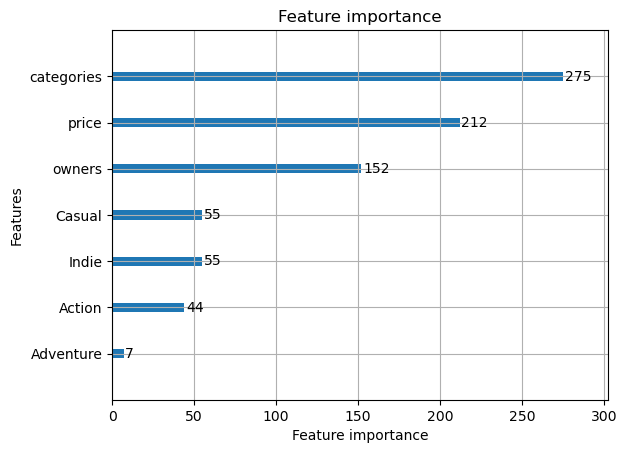

In [49]:
lgb.plot_importance(gbm)

In [50]:
end

NameError: name 'end' is not defined

### Owner popularity to genre

In [51]:
import pandas as pd

# Load the dataset
# Assuming your dataset is in a CSV file named 'games_data.csv'
# file_path = 'games_data.csv'
data = df

# Function to convert range to a single value
def convert_owners_range(owners_range):
    range_split = owners_range.split(' .. ')
    lower_bound = int(range_split[0].replace(',', ''))
    upper_bound = int(range_split[1].replace(',', ''))
    return (lower_bound + upper_bound) // 2

# Apply the conversion function to the 'owners' column
data['owners'] = data['owners'].apply(convert_owners_range)

# Print the updated dataset
# print(data)


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # Load the dataset
# file_path = 'games_data.csv'
# data = pd.read_csv(file_path)

# Preprocessing
# Drop rows with missing values
df.dropna(inplace=True)

# Feature Selection/Engineering
# For simplicity, let's select 'total_positive_reviews' and 'total_negative_reviews' as features
X = df[['Action', 'RPG', 'Adventure', 'Indie', 'Casual']]
y = df['owners']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 7703357563081.647
R^2 Score: 0.01942227224503168


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 7629031418504.952
R-squared: 0.028883414528117823
